In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('./datasets_lab/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data= data.drop(["id","date"],axis=1)
print(data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [5]:
y= data["price"]
X= data.drop(['price'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.10,random_state =2)

In [7]:
reg = LinearRegression()
reg.fit(X_train,y_train)

y_prediction=reg.predict(X_test)
print(y_prediction)
reg.score(X_test,y_test)

[ 708968.57473737 1454115.56763596  422619.27778277 ...  191420.54893178
  238056.68598477  451235.02573474]


0.7320342760357386

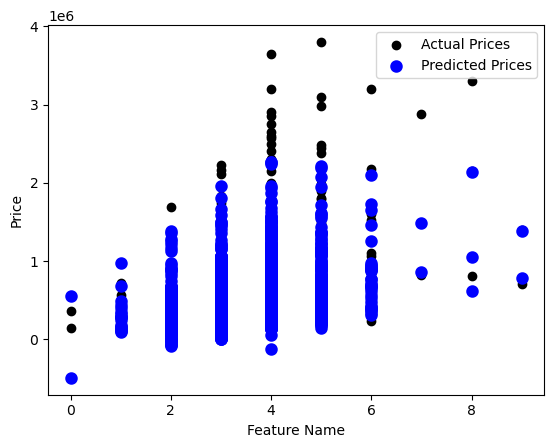

In [8]:

plt.scatter(X_test.iloc[:, 0], y_test, color="black", label="Actual Prices")
plt.scatter(X_test.iloc[:, 0], y_prediction, color="blue", label="Predicted Prices", linewidth=3)
plt.xlabel('Feature Name')  
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
X_test.size

38916

In [15]:
y_test.size
y_prediction.size

2162

In [11]:
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [-3.69584689e+04  3.99944474e+04  1.12442724e+02  1.05110204e-01
  6.09005604e+03  6.03577974e+05  5.14093954e+04  2.61292108e+04
  9.39146205e+04  7.03934445e+01  4.20492792e+01 -2.56363788e+03
  1.97755242e+01 -5.81262588e+02  6.06931004e+05 -2.14720057e+05
  2.18724560e+01 -3.52080103e-01]


In [18]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, y_prediction)
mse


39156588377.35194